# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [2]:
import scipy.io as sio

mat = sio.loadmat('data/ejer_1_data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [7]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   y       51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


In [9]:
df.describe()

,x1,x2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


In [10]:
df['y'].value_counts(normalize=True)

0    0.588235
1    0.411765
Name: y, dtype: float64

#### 4. Plot a scatterplot with the data

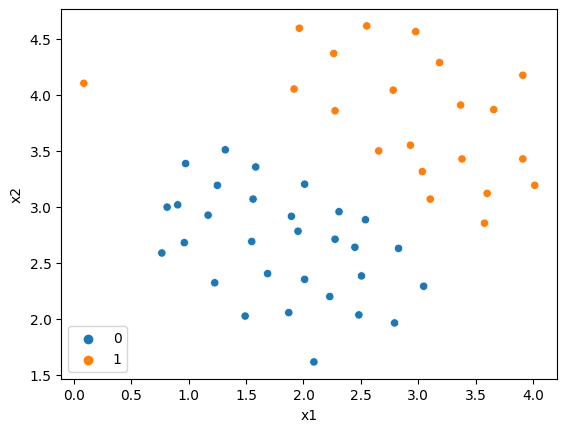

In [13]:
sns.scatterplot(df, x='x1', y='x2', hue='y')
plt.legend(loc="lower left")

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [15]:
from sklearn.svm import LinearSVC

svc_1 = LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [17]:
X = df[['x1', 'x2']]
y = df['y']

svc_1.fit(X, y)
svc_1.score(X, y)

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [24]:
svc_2 = LinearSVC(C=500, loss='hinge', max_iter=1000000)

svc_2.fit(X, y)
svc_2.score(X, y)

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [25]:
conf_level = svc_1.decision_function(X)
conf_level

array([ 0.80274518,  0.38382846,  1.37738845,  0.52107906,  0.33331381,
        0.86860011,  0.68642763,  1.61109824,  0.8343889 ,  1.16703618,
        1.07313927,  0.22972019,  0.33174483,  0.79571922,  0.31571217,
        1.27398976,  1.21008973,  0.99987325,  0.5646523 ,  0.38980592,
       -0.43529443, -0.30887087, -0.68627568, -0.55403779, -0.33252977,
       -0.29386009, -0.44071889, -0.9839959 , -0.68564359, -1.32848497,
       -1.00380178, -1.49231729, -0.61143945, -0.68346598, -1.00005396,
       -1.15275444, -1.57841842, -1.35599891, -1.03241749, -1.18506277,
       -0.77143746, -0.76694839, -0.46652886, -1.        , -0.5103502 ,
       -0.85864229, -1.55902702, -0.25491171, -1.11366903, -1.54720767,
       -0.70998365])

<Axes: xlabel='x1', ylabel='x2'>

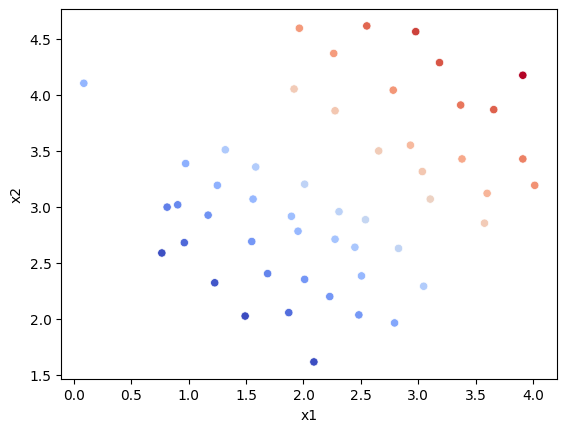

In [28]:
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

<Axes: xlabel='x1', ylabel='x2'>

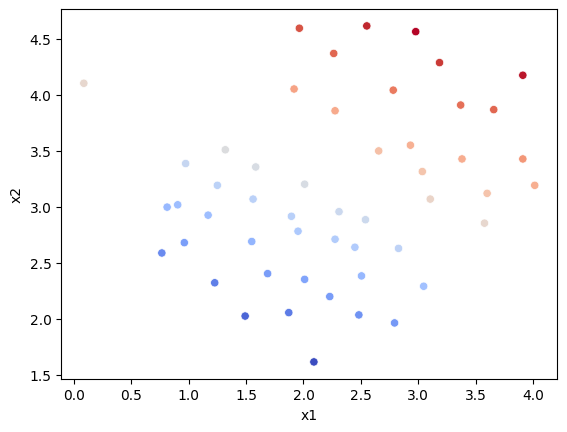

In [29]:
conf_level = svc_2.decision_function(X)
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")

y = ax1 + bx2 + c

0 = ax1 + bx2 + c

x2 = -ax1/b - c/b

In [36]:
svc_2.coef_

array([[3.32519245, 9.22717197]])

In [37]:
svc_2.intercept_

array([-37.24757064])

In [38]:
a = svc_2.coef_[0][0]
b = svc_2.coef_[0][1]
c = svc_2.intercept_

In [39]:
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

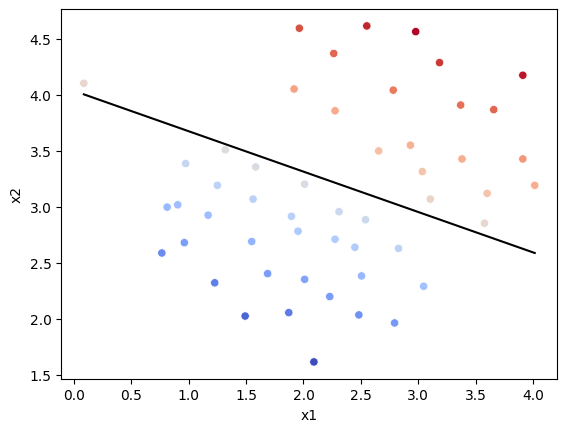

In [40]:
conf_level = svc_2.decision_function(X)
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")
plt.plot(x_points, y_points, color='k')

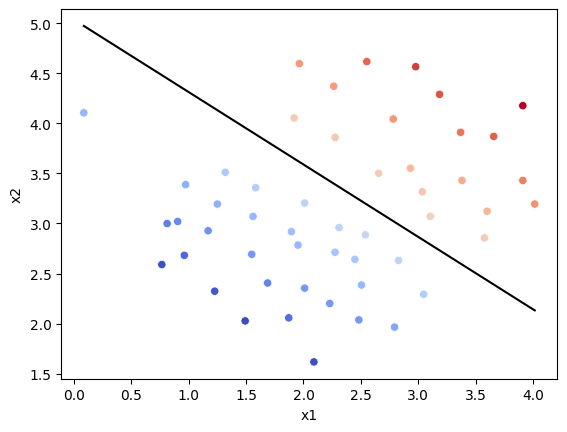

In [41]:
a = svc_1.coef_[0][0]
b = svc_1.coef_[0][1]
c = svc_1.intercept_

x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

conf_level = svc_1.decision_function(X)
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")
plt.plot(x_points, y_points, color='k')

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [42]:
mat = sio.loadmat('data/ejer_1_data2.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [44]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


In [46]:
df.describe()

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

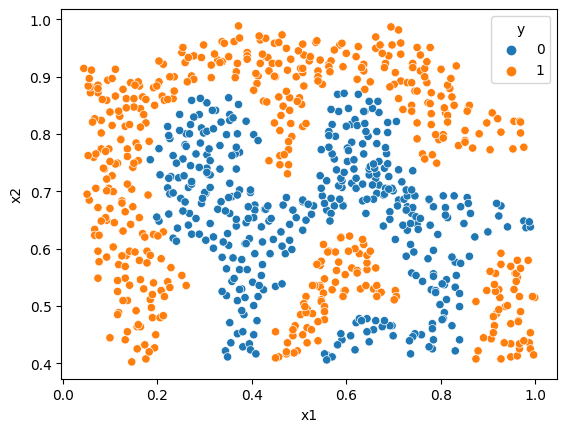

In [48]:
sns.scatterplot(df, x='x1', y='x2', hue='y')

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

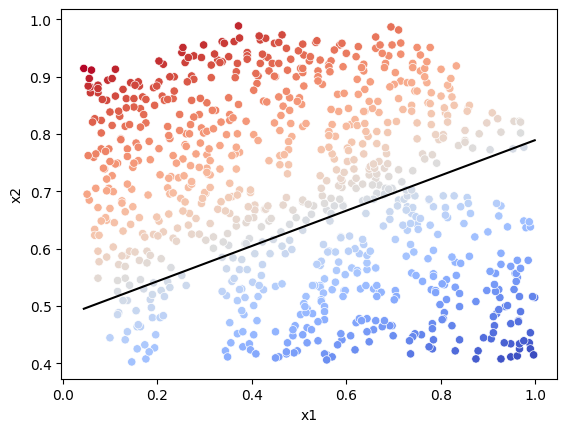

In [49]:
svc_3 = LinearSVC(C=1, loss='hinge', max_iter=1000000)

X = df[['x1', 'x2']]
y = df['y']

svc_3.fit(X, y)
svc_3.score(X, y)

a = svc_3.coef_[0][0]
b = svc_3.coef_[0][1]
c = svc_3.intercept_

x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

conf_level = svc_3.decision_function(X)
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")
plt.plot(x_points, y_points, color='k')

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [51]:
from sklearn.svm import SVC

In [52]:
svc_4 = SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [53]:
svc_4.fit(X, y)
svc_4.score(X, y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [54]:
y_pred_proba = svc_4.predict_proba(X)
y_pred_proba

array([[3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       ...,
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00]])

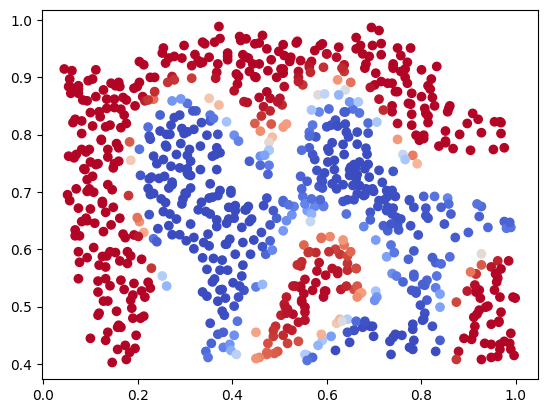

In [55]:
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

0.884125144843569


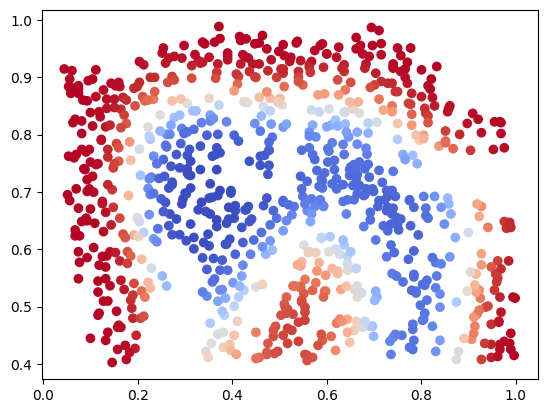

In [59]:
svc_5 = SVC(C=1, gamma=10, probability=True)
svc_5.fit(X, y)
print(svc_5.score(X, y))
y_pred_proba = svc_5.predict_proba(X)
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='x1', ylabel='x2'>

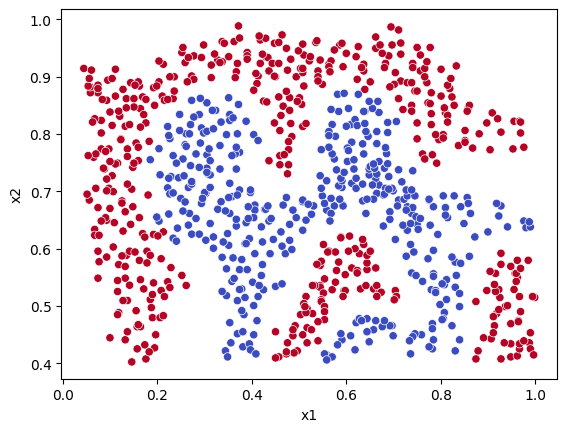

In [68]:
sns.scatterplot(df, x='x1', y='x2', c=df['y'], cmap='coolwarm')

<Axes: xlabel='x1', ylabel='x2'>

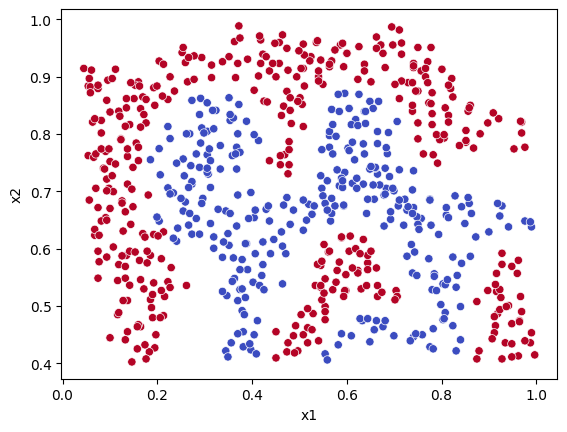

In [65]:
sns.scatterplot(X_train, x='x1', y='x2', c=y_train, cmap="coolwarm")

<Axes: xlabel='x1', ylabel='x2'>

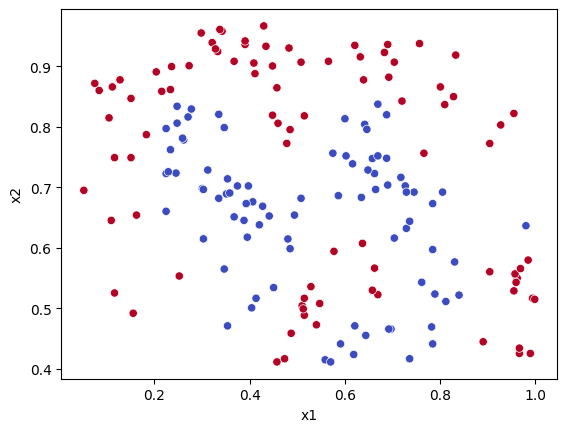

In [66]:
sns.scatterplot(X_test, x='x1', y='x2', c=y_test, cmap="coolwarm")

In [69]:
parameters = {
    "kernel": ['rbf', 'poly'],
    "C": [1, 10, 50, 100]
}

gs = GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.9536231884057973
{'C': 100, 'kernel': 'rbf'}
SVC(C=100)


In [70]:
final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

0.9421965317919075

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
parameters = {
    "kernel": ['rbf', 'poly'],
    "C": np.arange(50,300,5)
}

rs = RandomizedSearchCV(SVC(probability=True), parameters, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
rs.fit(X_train, y_train)

print(rs.best_score_)
print(rs.best_params_)
print(rs.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.9594202898550727
{'kernel': 'rbf', 'C': 185}
SVC(C=185, probability=True)


In [104]:
# {'kernel': 'rbf', 'C': 170}

In [105]:
final_model = rs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

0.9595375722543352

In [106]:
import pickle

filename = 'finished_model.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

In [107]:
with open(filename, 'rb') as archivo_entrada:
    modelo_importado = pickle.load(archivo_entrada)

In [108]:
modelo_importado

SVC(C=185, probability=True)

In [109]:
modelo_importado.predict([[0.4,0.7]])

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [112]:
df_eval = pd.DataFrame(X_test, columns=['x1','x2'])
df_eval['y'] = modelo_importado.predict_proba(X_test)[:,1]

<Axes: xlabel='x1', ylabel='x2'>

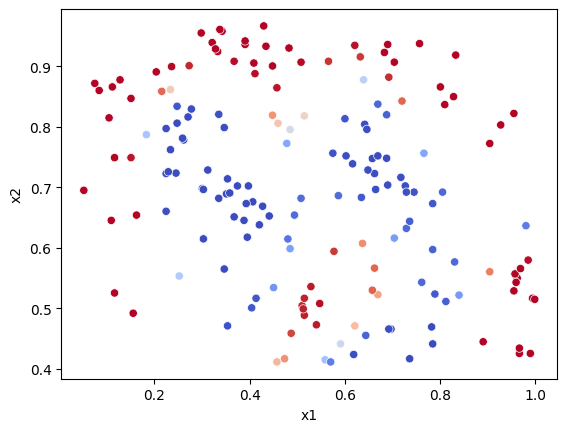

In [113]:
sns.scatterplot(df_eval, x='x1', y='x2', c=df_eval['y'], cmap="coolwarm")

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline((
    ('polynomial', PolynomialFeatures()),
    ('classifier', LinearSVC(max_iter=10000)))
)


params_svc = {'polynomial__degree': np.arange(2,10),
              'classifier__C': np.arange(1,100,5)}

gs = GridSearchCV(pipe, params_svc, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)
final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.828985507246377
{'classifier__C': 96, 'polynomial__degree': 9}
Pipeline(steps=[('polynomial', PolynomialFeatures(degree=9)),
                ('classifier', LinearSVC(C=96, max_iter=10000))])


c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8901734104046243

In [92]:
pipe = Pipeline((
    ('polynomial', PolynomialFeatures()),
    ('classifier', SVC()))
)

# params_svc = {'polynomial__degree': np.arange(2,10),
#               'classifier__C': np.arange(1,100,5)}

params_svcnl = {'polynomial': [PolynomialFeatures(2), PolynomialFeatures(3), None],
                # 'polynomial__degree': np.arange(1,10),
                # 'classifier': [SVC()],
                'classifier__kernel': ['rbf', 'poly'],
                'classifier__C': np.arange(150,400,5)}

# search_space = [params_svc, params_svcnl]

rs = RandomizedSearchCV(pipe, params_svcnl, cv=5, n_iter=30, scoring='accuracy', n_jobs=-1, verbose=2)
rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)
print(rs.best_estimator_)
final_model = rs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.9391304347826088
{'polynomial': None, 'classifier__kernel': 'rbf', 'classifier__C': 365}
Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('classifier', SVC(C=365))])


0.9364161849710982